In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
idx=pd.IndexSlice
plt.style.use('seaborn_modified')
# import seaborn as sns
# sns.set()

# Global Temperature -- Data from [NASA website](https://climate.nasa.gov/vital-signs/global-temperature)

In [2]:
T = pd.read_table('647_Global_Temperature_Data_File.txt',\
                  sep='     ',engine='python',index_col='year')
T.head()

,Annual mean,Lowess smoothing
year,,
1880,-0.20,-0.13
1881,-0.12,-0.16
1882,-0.10,-0.19
1883,-0.21,-0.21
1884,-0.28,-0.24


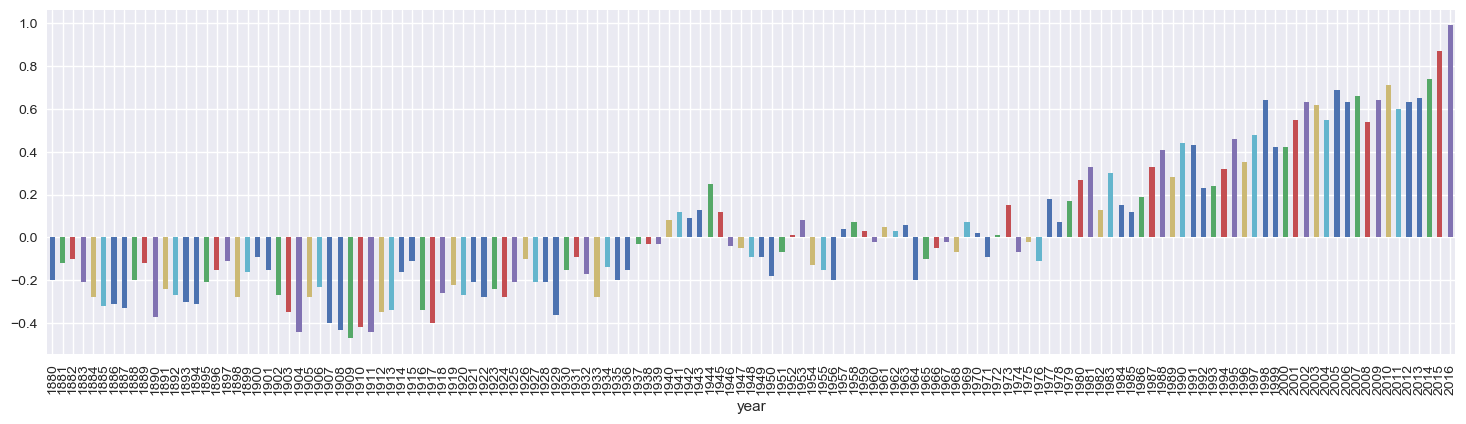

In [30]:
T['Annual mean'].plot(kind='bar',figsize=[16,4])
plt.show()

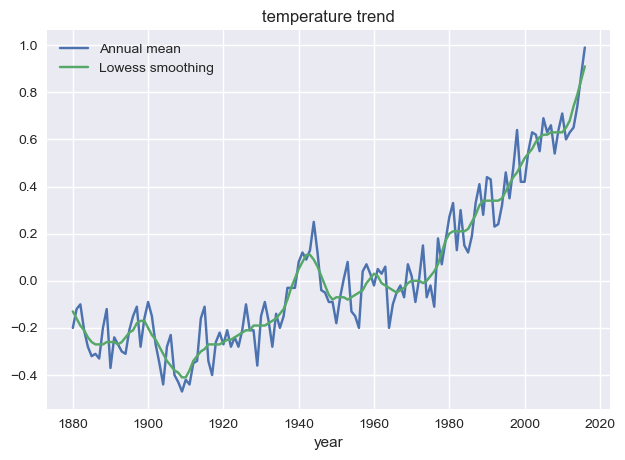

In [3]:
T.plot(title='temperature trend')
# T['Lowess smoothing'].plot()
# plt.savefig('temperature trend.png')
plt.show()

## $CO_2$ Trend -- Data from [NASA website](https://climate.nasa.gov/vital-signs/carbon-dioxide/)

In [4]:
co2 = pd.read_table('co2data.txt',sep='\s+')
co2.head()

,year,m,date,average,interp,trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


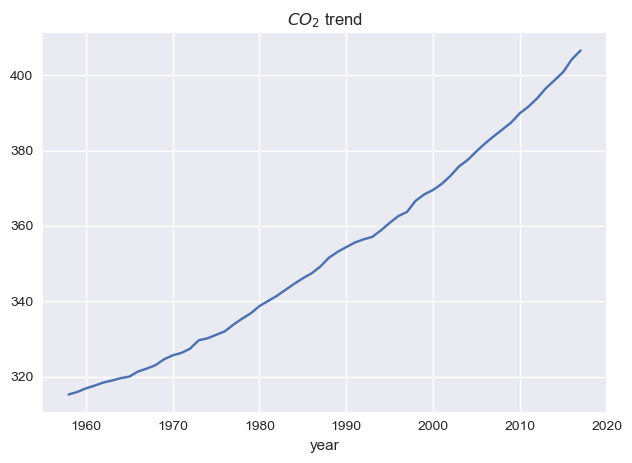

In [5]:
co2mean = co2.groupby('year')['trend'].mean()
co2mean.plot(title='$CO_2$ trend')
plt.savefig('co2 trend.png')
plt.show()

## 大西洋热带气旋 -- 数据来源：维基百科

In [10]:
# 数据爬取和整理
hurc = pd.read_html('https://en.wikipedia.org/wiki/Atlantic_hurricane_season')
hurc.pop(0);
hurc = pd.concat(hurc,ignore_index=True).set_index('Year')

hurri = hurc.drop(columns=['Number of\ntropical\ncyclones','Number of\ntropical cyclones',\
                          'Number of\ntropical\nstorms','Number of\ntropical storms',\
                          'Number of\nmajor\nhurricanes','Number of\nmajor hurricanes',\
                           'Number of\nhurricanes'])
hurri['number of tropical cyclones']=\
hurc['Number of\ntropical\ncyclones'].add(hurc['Number of\ntropical cyclones'],fill_value=0)
hurri['number of tropical storms']=\
hurc['Number of\ntropical\nstorms'].add(hurc['Number of\ntropical storms'],fill_value=0)
hurri['number of hurricanes']=hurc['Number of\nhurricanes']
hurri['number of major hurricanes']=\
hurc['Number of\nmajor\nhurricanes'].add(hurc['Number of\nmajor hurricanes'],fill_value=0)
# hurri.to_excel('cyclonehit_wiki.xlsx')
# hurri.head()

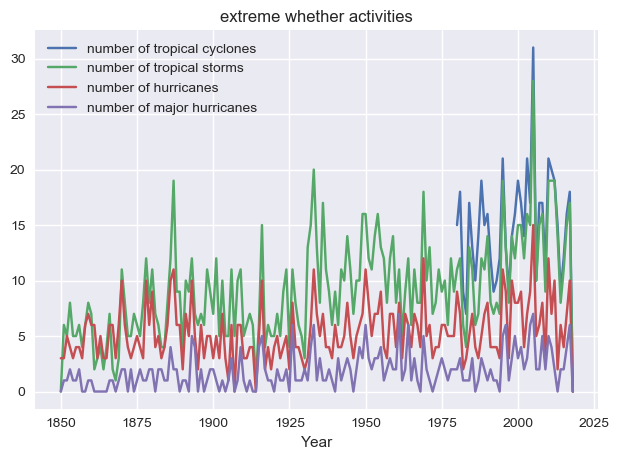

In [12]:
hurri.loc[:,idx['number of tropical cyclones':\
                'number of major hurricanes']].plot(title='extreme whether activities')
# plt.savefig('extreme whether activities.png')
plt.show()

In [2]:
hur = pd.read_excel('cyclonehit_wiki.xlsx')
hur.set_index('Year',inplace=True)
hur.head()

,Damage USD,Deaths,Major landfall hurricanes,Notes,Retired names,Strongest storm,number of tropical cyclones,number of tropical storms,number of hurricanes,number of major hurricanes
Year,,,,,,,,,,
1850,NaN,Not known,NaN,NaN,NaN,One,NaN,0,3,0
1851,NaN,24,Great Middle Florida Hurricane of 1851 (cat 3),NaN,NaN,Four,NaN,6,3,1
1852,NaN,100+,Great Mobile Hurricane of 1852 (cat 3),NaN,NaN,One,NaN,5,5,1
1853,NaN,40,NaN,NaN,NaN,Three,NaN,8,4,2
1854,NaN,30+,Coastal Hurricane of 1854 (cat 3),NaN,NaN,Three,NaN,5,3,1


### Tropical Cyclone 发生次数趋势

In [22]:
total = hur['number of major hurricanes']+hur['number of hurricanes']+\
hur['number of tropical storms']
total.drop(index=2018,inplace=True)
ratio = pd.DataFrame({'major hurricane':hur['number of major hurricanes']/total,
                    'hurricane':hur['number of hurricanes']/total,
                    'storm':hur['number of tropical storms']/total})
ratio.dropna(inplace=True)

In [23]:
from sklearn.linear_model import LinearRegression

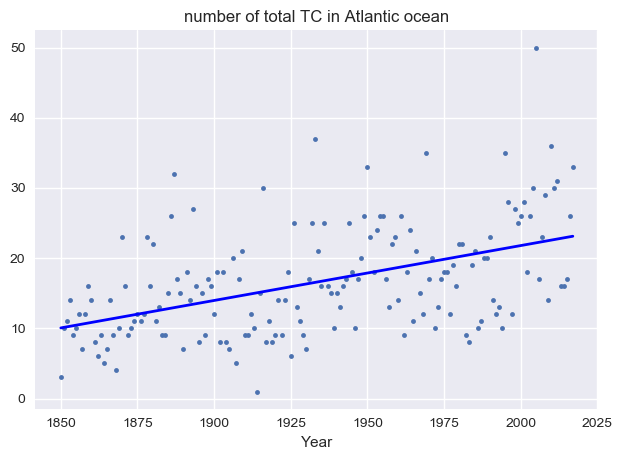

In [24]:
total.plot(linestyle='',marker='.')
model = LinearRegression(fit_intercept=True)
model.fit(total.index.values[:, np.newaxis], total)
yfit = model.predict(total.index.values[:, np.newaxis])
plt.plot(total.index.values[:, np.newaxis],yfit,linewidth = 2,color='blue')
plt.title('number of total TC in Atlantic ocean')
plt.savefig('number of total TC in Atlantic ocean.png')
plt.show()

### 三种气旋占总量的比例及其趋势

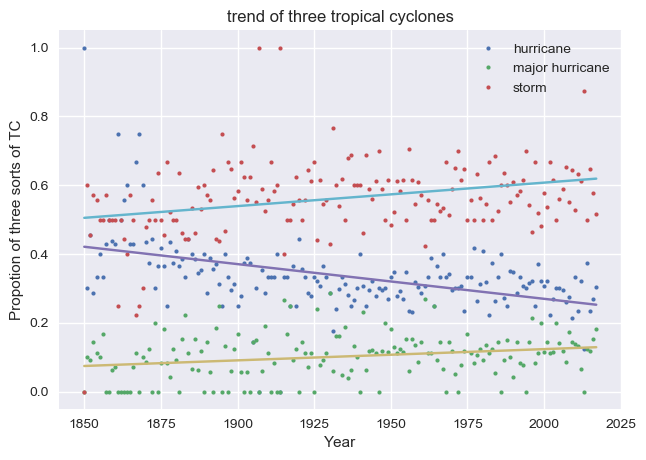

In [20]:
model = LinearRegression(fit_intercept=True)
model.fit(ratio.index.values[:, np.newaxis], ratio)
yfit = model.predict(ratio.index.values[:, np.newaxis])
ratio.plot(marker='o',linestyle='',markersize=3)
plt.plot(ratio.index.values[:, np.newaxis],yfit)
plt.title('trend of three tropical cyclones')
plt.ylabel('Propotion of three sorts of TC')
plt.savefig('trend of three tropical cyclones')
plt.show()